In [65]:
import pandas as pd
import datetime as datetime
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier

In [61]:
import json
with open('data.json') as x:
    unstructured = json.loads(x.read())

dates = list(unstructured.keys())
datetime = pd.to_datetime(list(unstructured.keys()))

newDict = {}
for x,y in zip(dates, datetime):
    newDict[y] = ' '.join([comment['body'] for comment in unstructured[x]])

    

In [62]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score



adaboost_params = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }

import matplotlib.pyplot as plt
import numpy as np
import itertools
def plot_confusion_matrix(cm, classes, outputFile='',
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    if outputFile == '':
        pass
    else:
        plt.savefig(outputFile)

In [63]:
import os
data = pd.read_excel('QF401 Data/EEM.xlsx')

data.columns = ['price', 'put call ratio']
data = data.iloc[1:]
data = data.sort_index(ascending=True)
data = data[data['put call ratio'].notnull()]

[0 for i in range(5)]


increment = [0] + data['price'].values.tolist()
priceShift = np.asarray(increment[:-1]) - data['price']
data['target'] = priceShift.apply(lambda x: 0 if x < 0 else 1)

increment = data['target'].tolist()

j = -1
for i in range(2, 6):
    increment = [0] + increment
    data['target ' + str(i)] = increment[:j]
    j += -1 
    


In [64]:
data

,price,put call ratio,target,target 2,target 3,target 4,target 5
2006-03-13,31.517,16.3939,0,0,0,0,0
2006-03-14,32.5,0.2615,0,0,0,0,0
2006-03-15,32.877,3.6415,0,0,0,0,0
2006-03-16,32.583,0.18,1,0,0,0,0
2006-03-17,32.813,1.2264,0,1,0,0,0
2006-03-20,33,19.4579,0,0,1,0,0
2006-03-21,32.333,2.0018,1,0,0,1,0
2006-03-22,32.69,12.9688,0,1,0,0,1
2006-03-23,32.387,0.3611,1,0,1,0,0
2006-03-24,32.667,0.8994,0,1,0,1,0


predicting index EEM.xlsx



['target', 'target 2', 'target 3', 'target 4', 'target 5']
test 1
accuracy score is 0.5829145728643216
roc_auc_score is 0.5787996054328857
mcc is 0.16110074448798686


mean accuracy score is 0.5829145728643216
mean roc score is 0.5787996054328857
mean mcc score is 0.16110074448798686
Confusion matrix, without normalization
[[282 132]
 [200 182]]
test 1
accuracy score is 0.5301507537688442
roc_auc_score is 0.5277988470873787
mcc is 0.05608187974107618


mean accuracy score is 0.5301507537688442
mean roc score is 0.5277988470873787
mean mcc score is 0.05608187974107618
Confusion matrix, without normalization
[[263 142]
 [189 202]]
test 1
accuracy score is 0.5050251256281407
roc_auc_score is 0.49596078901991497
mcc is -0.013505958649343956


mean accuracy score is 0.5050251256281407
mean roc score is 0.49596078901991497
mean mcc score is -0.013505958649343956
Confusion matrix, without normalization
[[373  36]
 [344  43]]
test 1
accuracy score is 0.523869346733

/usr/local/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


accuracy score is 0.5086058519793459
roc_auc_score is 0.5
mcc is 0.0


mean accuracy score is 0.5086058519793459
mean roc score is 0.5
mean mcc score is 0.0
Confusion matrix, without normalization
[[609   0]
 [553   0]]
predicting index SPX.xlsx



['target', 'target 2', 'target 3', 'target 4', 'target 5']
test 1
accuracy score is 0.5597269624573379
roc_auc_score is 0.5505894024276377
mcc is 0.1111750082854865


mean accuracy score is 0.5597269624573379
mean roc score is 0.5505894024276377
mean mcc score is 0.1111750082854865
Confusion matrix, without normalization
[[463 149]
 [367 193]]
test 1
accuracy score is 0.5588737201365188
roc_auc_score is 0.5508852849278382
mcc is 0.10986715277673566


mean accuracy score is 0.5588737201365188
mean roc score is 0.5508852849278382
mean mcc score is 0.10986715277673566
Confusion matrix, without normalization
[[452 153]
 [356 211]]
test 1
accuracy score is 0.5264505119453925
roc_auc_score is 0.504832865825152
mcc is 0.014483354681431448


mean ac

test 1
accuracy score is 0.5179153094462541
roc_auc_score is 0.5030036376069675
mcc is 0.006409116457059428


mean accuracy score is 0.5179153094462541
mean roc score is 0.5030036376069675
mean mcc score is 0.006409116457059428
Confusion matrix, without normalization
[[334 161]
 [291 135]]
test 1
accuracy score is 0.5385450597176982
roc_auc_score is 0.526571590747836
mcc is 0.05894173423857711


mean accuracy score is 0.5385450597176982
mean roc score is 0.526571590747836
mean mcc score is 0.05894173423857711
Confusion matrix, without normalization
[[358 125]
 [303 135]]
test 1
accuracy score is 0.5190010857763301
roc_auc_score is 0.4950988760847916
mcc is -0.01268496195750451


mean accuracy score is 0.5190010857763301
mean roc score is 0.4950988760847916
mean mcc score is -0.01268496195750451
Confusion matrix, without normalization
[[386  81]
 [368  86]]


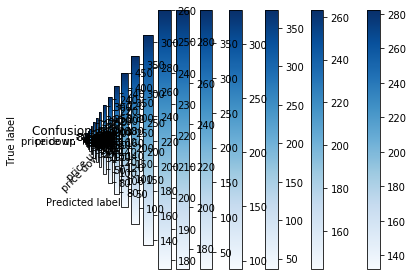

In [59]:
#rand_list = {"clf__C": stats.uniform(2, 10),
 #            "clf__gamma": stats.uniform(0.1, 1)}



import os
import pandas as pd
files = os.listdir('QF401 Data')
results = {}
for x in files:
    #setting up data from dataframe
    print('predicting index ' + str(x) + '\n\n\n')
    data = pd.read_excel('QF401 Data/' + x)
    data.columns = ['price', 'put call ratio']
    data = data.iloc[1:]
    data = data.sort_index(ascending=True)
    data = data[data['put call ratio'].notnull()]
    
    
    
    #incrementing to get next day price shift
    increment = [0] + data['price'].values.tolist()
    data['priceShift'] = increment[:-1] - data['price'] 
    #creating target variable
    data['target'] = data['priceShift'].apply(lambda x: 0 if x < 0 else 1)
    
    
    increment = data['target'].tolist()
    j = -1
    for i in range(2, 6):
        increment = [0] + increment
        data['target ' + str(i)] = increment[:j]
        j += -1 
    predictors = list(data.columns)[3:]
    print(predictors)
    results[x] = {}
    #running logistic regression
    for m in ('putcall', 'reddit'):
        if m == 'reddit':
            continue
        if m == 'putcall':
            model = svm.SVC(probability = True, random_state = 1)
            #theModel = RandomizedSearchCV(model, param_distributions = rand_list, n_iter = 20, n_jobs = 4, cv = 3, random_state = 2017, scoring = auc)

        if m == 'reddit':
            data = data.join(pd.DataFrame.from_dict(newDict, orient='index', columns=['text']), how='inner')
            model = Pipeline([
                ('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', AdaBoostClassifier(learning_rate = 1, n_estimators = 300, algorithm = 'SAMME'))])
        
        for y in predictors:
            
            accuracies, rocs, mcc = [], [], [] 
            for i in range(1, 2):
                train,test = train_test_split(data)
                if m == 'reddit':
                    model.fit(train['text'], train[y])
                    testInput = test['text']

                if m == 'putcall':
                    model.fit(train['put call ratio'].values.reshape(-1,1), train[y])
                    testInput = test['put call ratio'].values.reshape(-1, 1)

                predictions = model.predict(testInput)
                accuracies += [accuracy_score(test[y], predictions)]
                rocs += [roc_auc_score(test[y], predictions)]
                mcc += [matthews_corrcoef(test[y], predictions)]


           

            results[x][m + ' ' + y] = {'accuracy': np.mean(accuracies), 'roc': np.mean(rocs), 'mcc': np.mean(mcc)}
            print('\n\nmean accuracy score is ' + str(np.mean(accuracies)))
            print('mean roc score is ' + str(np.mean(rocs)))
            print('mean mcc score is ' + str(np.mean(mcc)))
            plot_confusion_matrix(confusion_matrix(test['target'], predictions), classes=['price up', 'price down'], outputFile='confusionMatrices/confusionMatrix' + m + ' ' + y + ' ' + x + '.png')

In [118]:
df = pd.DataFrame.from_dict(results)

for name in df.columns:
    subDF = pd.DataFrame(df[name])
    keys = subDF[name].iloc[0]
    for metric in keys:
        subDF[metric] = subDF[name].apply(lambda x: x[metric])
        subDF[subDF.columns.drop(name)].to_csv('indexPredictions/' + name.split('.xlsx')[0] + '.csv')

accuracy
roc
mcc
accuracy
roc
mcc
accuracy
roc
mcc
accuracy
roc
mcc
accuracy
roc
mcc
accuracy
roc
mcc
accuracy
roc
mcc
accuracy
roc
mcc
accuracy
roc
mcc
accuracy
roc
mcc
accuracy
roc
mcc


In [121]:
df = pd.DataFrame.from_dict(results).T

for name in df.columns:
    subDF = pd.DataFrame(df[name])
    keys = subDF[name].iloc[0]
    for metric in keys:
        subDF[metric] = subDF[name].apply(lambda x: x[metric])
        subDF[subDF.columns.drop(name)].to_csv('targetPredictions/' + name + '.csv')

accuracy
roc
mcc
accuracy
roc
mcc
accuracy
roc
mcc
accuracy
roc
mcc
accuracy
roc
mcc


In [123]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [172]:
#data = data.join(pd.DataFrame.from_dict(newDict, orient='index', columns=['text']), how='inner')
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_topics = 20

transformer = TfidfVectorizer()

tfidf = transformer.fit_transform(data.text)
fn = transformer.get_feature_names()
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd')
model = nmf.fit(tfidf)
nmf

In [174]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
    
print_top_words(model, fn, 10)

Topic #0: the to of and is you in that it for
Topic #1: you to and your for it if in have do
Topic #2: moderators submission performed concerns finance automatically appears compose bot action
Topic #3: 𝓢𝓔𝓧𝓤𝓐𝓛 drilldown driller drillers drilling drilll drills drillships dringend dringende
Topic #4: 𝓢𝓔𝓧𝓤𝓐𝓛 drilldown driller drillers drilling drilll drills drillships dringend dringende
Topic #5: wiki wikipedia en org autowikibot https 009 nsfw http np
Topic #6: 𝓢𝓔𝓧𝓤𝓐𝓛 drilldown driller drillers drilling drilll drills drillships dringend dringende
Topic #7: روزانه تحلیل به دلار جولای wikiforex فارکس تحلیل_روزانه_فارکس technicalanalysis تحلیل_تکنیکال
Topic #8: bitcoin it currency btc crypto is blockchain value bitcoins that
Topic #9: 𝓢𝓔𝓧𝓤𝓐𝓛 drilldown driller drillers drilling drilll drills drillships dringend dringende
Topic #10: 𝓢𝓔𝓧𝓤𝓐𝓛 drilldown driller drillers drilling drilll drills drillships dringend dringende
Topic #11: 𝓢𝓔𝓧𝓤𝓐𝓛 drilldown driller drillers drilling drilll drills drillsh

In [ ]:
confusion_matrix(test['target'], predictions)
accuracy_score(test['target'], predictions)

Confusion matrix, without normalization
[[400   8]
 [380   8]]


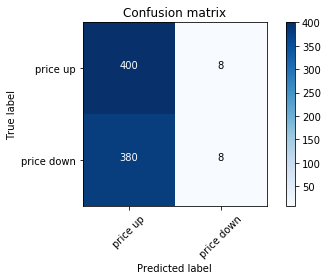

In [84]:
plot_confusion_matrix(confusion_matrix(test['target'], predictions), classes=['price up', 'price down'])

0.5005053567818879

0.0035997036270027484

### predicting from reddit data

In [117]:
len(unstructured)

2078

,price,put call ratio,priceShift,target
2000-11-28,27,12.5,-27,0
2001-01-05,28.25,1,-1.25,0
2001-01-09,28.1875,30,0.0625,1
2001-01-19,29.1406,6.6667,-0.9531,0
2001-02-01,29.61,2.931,-0.4694,0
2001-02-27,29.04,1.6667,0.57,1
2001-03-12,27.16,21,1.88,1
2001-04-03,25.9,0.9524,1.26,1
2001-04-23,28.31,0.4167,-2.41,0
2001-06-20,29.16,1.5,-0.85,0


In [120]:

index['words'] = index['Date'].apply(lambda x: newDict[x] if x in newDict.keys() else 'null')
withWords = index[index['words'] != 'null'].reset_index(drop=True)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', AdaBoostClassifier(learning_rate = 1, n_estimators = 300, algorithm = 'SAMME'))])

pipeline.fit(train['words'], train['target'])
results = pipeline.predict(test['words'])

1435

In [126]:
train = withWords.iloc[0:1000].reset_index(drop=True)

test = withWords.iloc[1100:].reset_index(drop=True)

In [128]:
test['target'].value_counts()[0]/len(test)

0.564179104477612

Confusion matrix, without normalization
[[115  74]
 [ 87  59]]


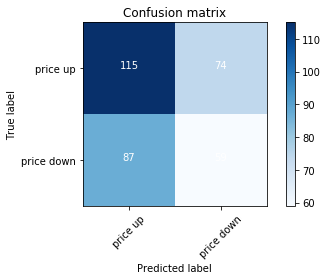

In [136]:
plot_confusion_matrix(confusion_matrix(test['target'], results), classes=['price up', 'price down'])
plt.savefig('download.png')

In [130]:
roc_auc_score(test['target'], results)

0.5062875987533522

In [131]:
matthews_corrcoef(test['target'], results)

0.01274443655480002

In [132]:
accuracy_score(test['target'], results)

0.5194029850746269

In [139]:
train[['Date', 'target', 'words']].iloc[4:].reset_index(drop=True)

,Date,target,words
0,2013-02-25,1,Not sure. Although I would consider myself a p...
1,2013-02-26,0,"Lol, 10 observation regression, such power! [d..."
2,2013-02-27,0,[deleted] I lost in the western michigan compe...
3,2013-02-28,1,I think discussion around derivatives misses t...
4,2013-03-01,0,"&gt; Unfortunately, the biggest problem that b..."
5,2013-03-04,0,They may have it hedged.\n\nThink of it this w...
6,2013-03-05,0,Actually the guys that he has been putting in ...
7,2013-03-06,0,No worries! We're both just trying to help and...
8,2013-03-07,0,I'm seeing some irrational exhuberance. Im no...
9,2013-03-08,0,Thanks for clarifying. I wholeheartedly agree....
